In [7]:
import pandas as pd
import numpy as np
import ast
import os

# the data form is required to have no space at the beginning and nothing and the end,
# and dicts should be separated with comma.

#raw data files:
paths = []
directory = 'C:/Users/ZHT/Documents/dataProcess/Pon_behaviorC/' #'/Users/rubythurs/Documents/222' #/Users/rubythurs/PycharmProjects/count/datadoe/3'#
for filename in os.listdir(directory):
    if os.path.isfile(os.path.join(directory, filename)):
        filepath = os.path.join(directory,filename)
        paths.append(filepath)
        
len(paths)


5

In [8]:
dictx = []
for i in range(0,len(paths)):
    path = paths[i]
    with open(path) as f:
        data = f.read()
        data2 = ast.literal_eval(data) #tuple
        for item in data2:
            if isinstance(item, dict):
                dictx.append(item)

pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', None)
df = pd.DataFrame(dictx)
dfg = df.dropna(subset=['grade'])
dfg.shape

ValueError: malformed node or string on line 6: <ast.Name object at 0x00000287E9747C50>

In [3]:
#unite the grades
mask =  dfg['ini_time'] == dfg['ini_time'].shift(-1)
dfg.loc[mask, 'grade'] = np.nan
dfgh = dfg.bfill()
# things to analyze
dfgh['response_time'] = dfgh['click_time']-dfgh['ini_time']
dfgh[['ini_x','ini_y']] = dfgh['ini_pos'].str.strip('()').str.split(',', expand=True)
dfgh[['click_x','click_y']] = dfgh['click_pos'].str.strip('()').str.split(',', expand=True)
# Convert the entire 'Column1' from string to numeric
columns_to_convert = ['click_x', 'click_y', 'ini_x','ini_y']
dfgh[columns_to_convert] = dfgh[columns_to_convert].apply(pd.to_numeric)
dfgh = dfgh.sort_values('percent_visible')
dfgh['group']= pd.cut(dfgh['percent_visible'],bins=[i/10 for i in range(11)], labels=[f'{i/10}-{(i+1)/10}' for i in range(10)])
dfgh.shape

(988, 17)

percent groups: 9
0.1-0.2,  total_touches: 87,  total_trails:29,  cor_rate: 0.93,
0.2-0.3,  total_touches: 127,  total_trails:40,  cor_rate: 0.92,
0.3-0.4,  total_touches: 114,  total_trails:38,  cor_rate: 1.0,
0.4-0.5,  total_touches: 88,  total_trails:29,  cor_rate: 0.97,
0.5-0.6,  total_touches: 106,  total_trails:32,  cor_rate: 1.0,
0.6-0.7,  total_touches: 100,  total_trails:31,  cor_rate: 0.97,
0.7-0.8,  total_touches: 125,  total_trails:40,  cor_rate: 0.98,
0.8-0.9,  total_touches: 130,  total_trails:41,  cor_rate: 0.98,
0.9-1.0,  total_touches: 111,  total_trails:35,  cor_rate: 1.0,


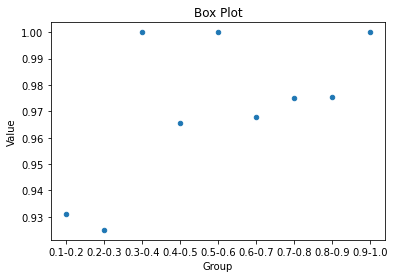

In [4]:
unique_groups = dfgh['group'].unique()
print(f'percent groups: {len(unique_groups)}')


# Create a dictionary to store the selected DataFrames
dfs = {} #all responses
dfss ={} # 1 response per trail

per = []
c_rate = []

# Select rows for each unique value in the "Group" column
for group_value in unique_groups:
    dfs[group_value] = dfgh[dfgh['group'] == group_value]
    #correct rate
    latest_touch_time= dfs[group_value].groupby('ini_time')['response_time'].idxmax()
    dfss[group_value] = dfs[group_value].loc[latest_touch_time]
    q = dfss[group_value]['grade'].value_counts()[1]
    shape = dfss[group_value].shape[0]
    rate=q / shape
    
    per.append(group_value)
    c_rate.append(rate)

    print(f'{group_value},  total_touches: {dfs[group_value].shape[0]},  total_trails:{shape},  cor_rate: {rate.round(2)},')

dft = {'percent':per,'rate':c_rate,}
dft = pd.DataFrame(dft)
dft

import pandas as pd
import matplotlib.pyplot as plt



dft.plot.scatter(y='rate', x='percent')

# Set the plot title and axis labels
plt.title('Box Plot')
plt.xlabel('Group')
plt.ylabel('Value')

# Display the plot
plt.show()

In [5]:
unique_groups = dfgh['group'].unique()
print(f'percent groups: {len(unique_groups)}')


# Create a dictionary to store the selected DataFrames
dfs = {} #all responses


# Select rows for each unique value in the "Group" column
for group_value in unique_groups:
    dfs[group_value] = dfgh[dfgh['group'] == group_value]    
    #time message
    loc1 = dfs[group_value].groupby('ini_time')['response_time'].idxmax()
    loc0 = dfs[group_value].groupby('ini_time')['response_time'].idxmin()
    mintime= dfs[group_value].loc[loc0]['response_time'].values * 0.001
    maxtime= dfs[group_value].loc[loc1].response_time.values *0.001
    duration = (maxtime-mintime)
    #print(f'{group_value},   {mintime.mean().round()},  {maxtime.mean().round()},  {duration.mean().round()}')
    print(f'{group_value},  {mintime.std().round()},  {maxtime.std().round()},  {duration.std().round()},')




percent groups: 9
0.1-0.2,  1932.0,  1930.0,  161.0,
0.2-0.3,  740.0,  832.0,  370.0,
0.3-0.4,  615.0,  630.0,  39.0,
0.4-0.5,  445.0,  446.0,  68.0,
0.5-0.6,  354.0,  388.0,  345.0,
0.6-0.7,  328.0,  491.0,  317.0,
0.7-0.8,  464.0,  543.0,  254.0,
0.8-0.9,  451.0,  506.0,  268.0,
0.9-1.0,  487.0,  537.0,  235.0,


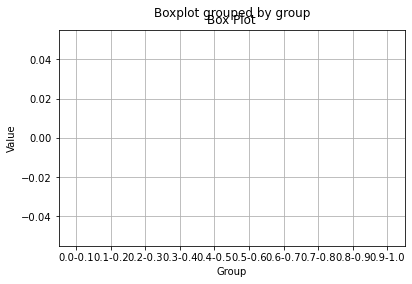

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


th = 50000
dfgh2 = dfgh[dfgh['response_time'] <= th]
dfgh2.boxplot(column='response_time', by='group')

# Set the plot title and axis labels
plt.title('Box Plot')
plt.xlabel('Group')
plt.ylabel('Value')

# Display the plot
plt.show()

In [7]:
unique_groups = dfgh['group'].unique()
print(f'percent groups: {len(unique_groups)}')

th = 100000
dfgh2 = dfgh[dfgh['response_time'] <= th]


# Create a dictionary to store the selected DataFrames
dfs = {} #all responses

per = []
max_time =[]
min_time = []
t =[]
# Select rows for each unique value in the "Group" column
for group_value in unique_groups:
    dfs[group_value] = dfgh2[dfgh2['group'] == group_value]    
    #time message
    loc1 = dfs[group_value].groupby('ini_time')['response_time'].idxmax()
    loc0 = dfs[group_value].groupby('ini_time')['response_time'].idxmin()
    mintime= dfs[group_value].loc[loc0]['response_time'].values * 0.001
    maxtime= dfs[group_value].loc[loc1].response_time.values *0.001
    duration = (maxtime-mintime)
    per.append(group_value)
    max_time.append(maxtime)
    min_time.append(mintime)
    t.append(dfgh2[dfgh2['group'] == group_value].response_time*0.001)
    
dftb1 = {'percent':per,'maxtime':max_time,}
dftb0 = {'percent':per,'mintime':min_time,}
dftb1 = pd.DataFrame(dftb1)
dftb0 = pd.DataFrame(dftb0)
dfgha = pd.DataFrame({'percent':per,'t':t})

dfgh2.shape

percent groups: 9


(1, 17)

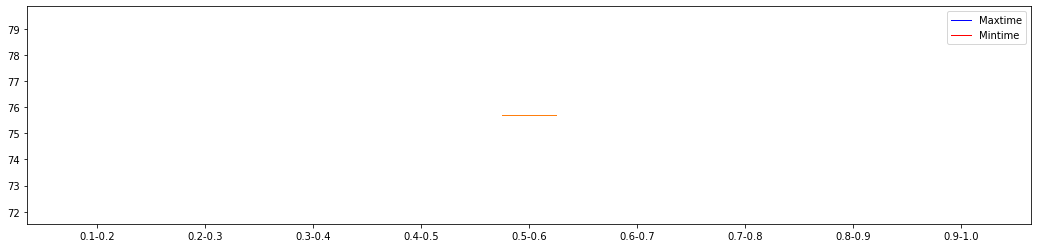

In [8]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots(figsize=(18,4))

boxplot3 = ax.boxplot(dfgha['t'],positions=[x + 0.15 for x in range(len(dftb0))], widths=0.2)

boxplot1 = ax.boxplot(dftb1['maxtime'], positions=range(len(dftb1)), widths=0.2)

boxplot2 = ax.boxplot(dftb0['mintime'], positions=[x + 0.3 for x in range(len(dftb0))], widths=0.2)
ax.set_xticks([x + 0.15 for x in range(len(dftb0))])
ax.set_xticklabels(dftb0['percent'])

for i in range(9):
    boxplot1['boxes'][i].set(color='blue')
    boxplot2['boxes'][i].set(color='red')
    boxplot3['boxes'][i].set(color='orange')
    
# Add legend
ax.legend([boxplot1["boxes"][0], boxplot2["boxes"][0]], ['Maxtime', 'Mintime'])

# Show the plot
plt.show()